In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from cp_utils.cp_dir_file_ops import define_env

if define_env() == 'SERVER':
    dir = '/home/neo/PycharmProjects/Course1/subprojects/sp02_omniiseg_fgn_mmdet/COCO2VOC_DCL_FT'
elif define_env() == 'PC':
    dir = 'C:/Users/Art/PycharmProjects/Course1/subprojects/sp02_omniiseg_fgn_mmdet/COCO2VOC_DCL_FT'
else:
    raise NotImplementedError

tags = [
    'COCO_val_FT_Ignore_bbox_mAP_base_',
    'COCO_val_FT_Ignore_isegm_mAP_base_',
]

/tmp/ipykernel_1821325/138763696.py:43: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


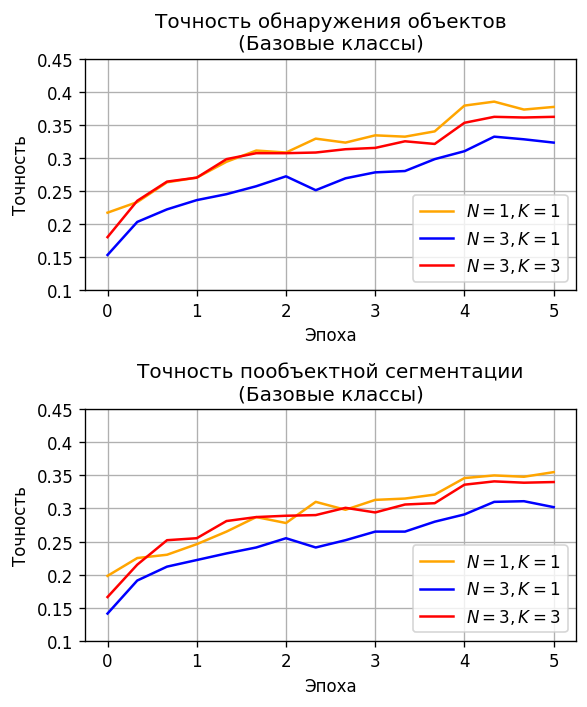

In [3]:
sp0 = f'N1-K1-B12 2022-02-24_11-27-34 C2V-DCL LR 0.005 WD 1e-05 Adam STANDARD'
sp1 = f'N3-K1-B10 2022-02-23_23-11-39 C2V-DCL LR 0.005 WD 1e-05 Adam STANDARD'
sp2 = f'N3-K3-B8 2022-02-23_22-00-04 C2V-DCL LR 0.005 WD 1e-05 Adam STANDARD'

fig, ax = plt.subplots(nrows=2,
                       figsize=(5, 6), dpi=120, facecolor='white',
                       constrained_layout=True)
plt.rcParams['font.size'] = 10

ax[0].set_title('Точность обнаружения объектов\n(Базовые классы)')
ax[1].set_title('Точность пообъектной сегментации\n(Базовые классы)')

arange = np.arange(16)

xticks = np.arange(6) * 3
xticks_labels = np.arange(6)

accuracy = np.arange(10, 50, 5) / 100
colors = ['orange', 'blue', 'red']
labels = ['$N = 1, K = 1$', '$N = 3, K = 1$', '$N = 3, K = 3$']

for i, sp in enumerate([sp0, sp1, sp2]):
    color = colors[i]
    label = labels[i]
    for j, tag in enumerate(tags):
        row = j // 2
        col = j % 2
        fp = os.path.join(dir, sp  + '-tag-' + tag + '.csv')
        # Wall time, Step, Value
        data = np.around(np.loadtxt(fp, delimiter=',', skiprows=1)[:, 2], decimals=3)
        ax[col].plot(arange, data, color=color, label=label)
        ax[col].legend(loc='lower right')
        if row == 1:
            ax[row, col].legend(loc='upper right')
        ax[col].grid(True)
        ax[col].set_ylabel('Точность')
        ax[col].set_xlabel('Эпоха')
        ax[col].set_xticks(xticks)
        ax[col].set_xticklabels(xticks_labels)
        ax[col].set_yticks(accuracy)
        ax[col].set_yticklabels(accuracy)

plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_FT_Best.png', facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)
plt.show()

In [ ]:
plt.close('all')

N = 1, K = 1 ,  w = 0.01,0.364,0.296,
N = 1, K = 1 ,  w = 0.05,0.388,0.315,
N = 1, K = 1 ,  w = 0.1,0.395,0.32,
N = 3, K = 1 ,  w = 0.01,0.279,0.237,
N = 3, K = 1 ,  w = 0.05,0.316,0.27,
N = 3, K = 1 ,  w = 0.1,0.321,0.271,
N = 3, K = 3 ,  w = 0.01,0.353,0.301,
N = 3, K = 3 ,  w = 0.05,0.372,0.313,
N = 3, K = 3 ,  w = 0.1,0.392,0.318,


/tmp/ipykernel_1821325/3817324224.py:69: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.tight_layout()


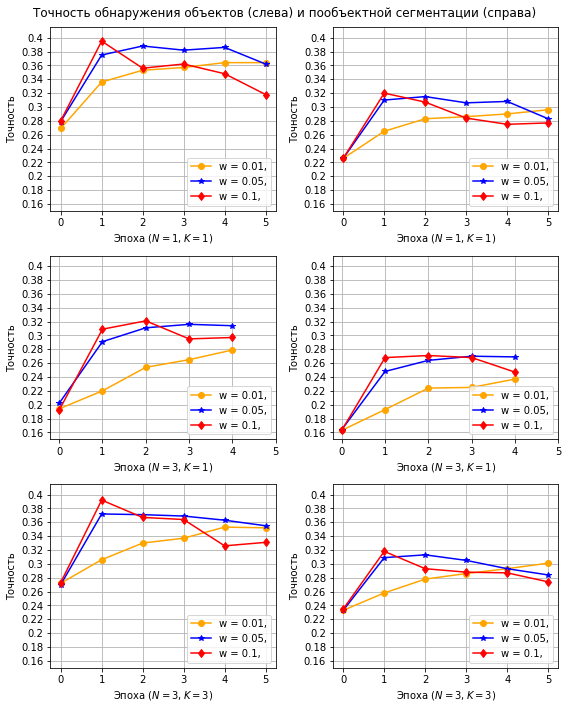

In [4]:
sps = [
    'N1-K1-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.01',
    'N1-K1-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.05',
    'N1-K1-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.1',
    'N3-K1-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.01',
    'N3-K1-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.05',
    'N3-K1-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.1',
    'N3-K3-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.01',
    'N3-K3-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.05',
    'N3-K3-B4 DCL-FT LR 0.005 WD 5e-05 Adam StepG 0.1',
]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(8, 10), facecolor='white',
                       constrained_layout=True)
plt.rcParams['font.size'] = 10

arange = np.arange(6)
accuracy = np.arange(0, 105, 2) / 100
colors = ['orange', 'blue', 'red']
# colors_groups = [
#     ['darkorange', 'olive', 'goldenrod'],
#     ['navy', 'purple', 'crimson'],
#     ['chocolate', 'maroon', 'orange']
# ]
markers = ['o', '*', 'd']
labels = [
    '$N = 1, K = 1$',
    '$N = 3, K = 1$',
    '$N = 3, K = 3$'
]

tags_segm = [
    'VOC_trainval_FT_Use_bbox_mAP_novel_children',
    'VOC_trainval_FT_Use_isegm_mAP_novel_children',
]

for i, sp in enumerate(sps):
    fp = os.path.join(dir, sp)
    num = sp.split(' ')[-1].strip()
    label = f'w = {num},'
    print(labels[i // 3][1:-1], ', ', label, end='')
    for j, tag in enumerate(tags_segm):
        # Wall time, Step, Value
        _sp = sp + '-tag-' + tag + '.csv'
        fp = os.path.join(dir, _sp)
        # print(os.path.exists(fp), _sp)
        # continue
        data = np.around(np.loadtxt(fp, delimiter=',', skiprows=1)[:, 2], decimals=3)
        row = i // 3
        col = j
        color = i % 3
        ax[row, j].plot(data, label=label, color=colors[color], marker=markers[color])
        print(max(data), end=',')
    print('')

for row in range(3):
    for col in range(2):
        ax[row, col].legend(loc='lower right')
        ax[row, col].grid(True)
        ax[row, col].set_ylabel('Точность')
        ax[row, col].set_xlabel(f'Эпоха ({labels[row]})')
        ax[row, col].set_xticks(arange)
        ax[row, col].set_xticklabels(arange)
        ax[row, col].set_yticks(accuracy)
        ax[row, col].set_yticklabels(accuracy)
        ax[row, col].set_ylim(0.15, 0.415)

plt.suptitle(f'Точность обнаружения объектов (слева) и пообъектной сегментации (справа)')
plt.tight_layout()
plt.savefig('COCO2VOC_DCL_FT_Test.png', facecolor=fig.get_facecolor(), edgecolor='none', transparent=False)
plt.show()

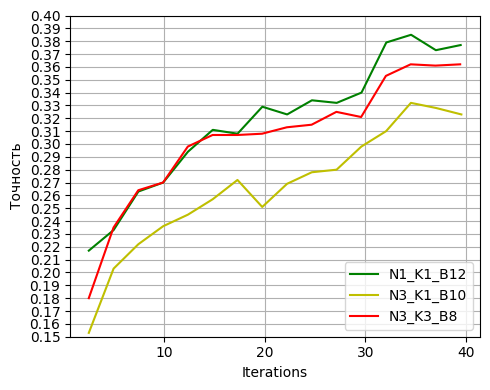

In [6]:
tag = 'COCO_val_FT_Ignore_bbox_mAP_base_'
sp0 = f'N1-K1-B12 2022-02-24_11-27-34 C2V-DCL LR 0.005 WD 1e-05 Adam STANDARD-tag-{tag}.csv'
sp1 = f'N3-K1-B10 2022-02-23_23-11-39 C2V-DCL LR 0.005 WD 1e-05 Adam STANDARD-tag-{tag}.csv'
sp2 = f'N3-K3-B8 2022-02-23_22-00-04 C2V-DCL LR 0.005 WD 1e-05 Adam STANDARD-tag-{tag}.csv'

fp0 = os.path.join(dir, sp0)
fp1 = os.path.join(dir, sp1)
fp2 = os.path.join(dir, sp2)

# Wall time, Step, Value
data0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 2], decimals=3)
data1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 2], decimals=3)
data2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 2], decimals=3)

steps0 = np.around(np.loadtxt(fp0, delimiter=',', skiprows=1)[:, 1], decimals=3) * 12
steps1 = np.around(np.loadtxt(fp1, delimiter=',', skiprows=1)[:, 1], decimals=3) * 10
steps2 = np.around(np.loadtxt(fp2, delimiter=',', skiprows=1)[:, 1], decimals=3) * 8

fig = plt.figure(figsize=(5, 4), dpi=100, facecolor='white')

plt.ylabel('Точность')
accuracy = np.arange(50, dtype=np.int32) * 0.01
plt.yticks(accuracy)
plt.ylim(0.15, 0.40)

plt.xlabel('Iterations')
steps = np.arange(5, dtype=np.int32) * 100000
ticks = np.arange(5, dtype=np.int32) * 10
plt.xticks(steps, ticks)

plt.plot(steps0, data0, 'g-', label='N1_K1_B12')
plt.plot(steps1, data1, 'y-', label='N3_K1_B10')
plt.plot(steps2, data2, 'r-', label='N3_K3_B8')

plt.grid(True)
# plt.legend(loc='upper left')
plt.legend(loc='lower right')
plt.tight_layout()
# plt.title(f'Experiments with different learning rates $\gamma$')
plt.savefig('COCO2VOC_DCL_All_NK_Final.png', facecolor=fig.get_facecolor(), edgecolor='none',
            transparent=False)
plt.show()